In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PowerTransformer
from numpy.random import randn
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import patsy
from numpy import sqrt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN

#library to create the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config

#to save and load the pipeline and model fitted in a pickle (.pkl) file
import pickle
import patsy

#import geocoder
from geopy.geocoders import GoogleV3

ModuleNotFoundError: No module named 'geopy'

In [2]:
#df = pd.read_csv('housing.csv')
df = pd.read_csv('housing_geoloc.csv')
df = pd.DataFrame(df)
df = df.drop(columns = ['Unnamed: 0'])

In [3]:
df['list_adresses'] = df['addresses'].apply(lambda x: x.split(','))
df['len_list_adresses'] = df['list_adresses'].apply(lambda x: len(x))
df = df[df['len_list_adresses'] > 2]
df['zip_code'] = df['list_adresses'].apply(lambda x: x[-2].replace('CA', '').strip())
df['city'] = df['list_adresses'].apply(lambda x: x[-3])
df = df[df['zip_code'] != '']
df = df[df['median_house_value'] < 499000]
df['zip_code'] = df['zip_code'].apply(lambda x: x[-5:])
df['zip_code'] = df['zip_code'].apply(lambda x: x if x[0] == '9' else 'NA')
df = df[df['zip_code'] != 'NA']
df['zip_simplified'] = df['zip_code'].apply(lambda x: x[0:-1])
df['zip_simplified2'] = df['zip_code'].apply(lambda x: x[0:-2])
df['pop_per_bedrooms'] = df['population']/df['total_bedrooms']
df['pop_per_rooms'] = df['population']/df['total_rooms']

In [ ]:
pt = PowerTransformer(method='box-cox')
pt.fit(df)

In [ ]:
df.head()

In [ ]:
df = df.drop(columns = ['list_adresses'])

In [ ]:
df.duplicated().any()

In [ ]:
df['zip_simplified2'].value_counts()

In [ ]:
df

In [ ]:
df.count()/df.shape[0]

In [ ]:
df_city_list = df['city'].value_counts()
df_city_list = pd.DataFrame(df_city_list)
df_city_list1 = df_city_list[df_city_list['city'] == 1]

In [ ]:
df_city_list1

In [ ]:
X = df[['latitude','longitude']]

In [ ]:
#google_key = "my_api_key"
#geolocator = GoogleV3(api_key = google_key)

#dict_geoloc = {}

#for i in range(9355, len(X.index)):
#    lat = X['latitude'][i]
#    long = X['longitude'][i]
#    coordinates = f"{lat}, {long}"
#    locations = geolocator.reverse(coordinates)
#    address = str(locations)
#    dict_geoloc[i] = address  
#dict_geoloc_pd = pd.DataFrame.from_dict(dict_geoloc, orient = 'index')
#df['addresses'] = dict_geoloc_pd[0]
#df.to_csv('housing_geoloc.csv')


In [ ]:
df.to_csv('housing_geoloc.csv') 

In [ ]:
dict_geoloc_pd.to_csv('geoloc.csv')

In [ ]:
sns.lmplot('latitude', 'longitude', df)

In [ ]:
X = df[['latitude','longitude']]

In [ ]:
clustering = DBSCAN(eps=0.15, min_samples=2).fit(X)
clust = clustering.labels_

In [ ]:
X['clust'] = clust
X['clust'].value_counts()
#X['clust'].unique()

In [ ]:
sns.lmplot('latitude', 'longitude', X, hue = 'clust')

In [ ]:
df['clust'] = X['clust'].astype(str)

In [16]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   
5       413.0       193.0         4.0368            269700.0        NEAR BAY   

                                         addresses  \
0  3126 Grizzly Peak Blvd, Berkeley, CA 94705, USA   
1           2005 Tunnel Rd, Oakland, CA 94611, USA   
3           6365 Florio St, Oakland, CA 94618, USA   
4           6365 Florio St, Oakland, CA 94618, USA   
5           6365 Florio St, Oakland, CA 94618, USA   

                                       list_adresses  len_list_adresses  \
0  [3126 Grizzly Peak Blvd,  Berkeley,  CA 94705,...                  4   
1        [2005 Tunnel Rd,  Oakland,  CA 94611,  USA]                  4   
3        [6365 Florio St,  Oakland,  CA 94618,  USA]                  4   
4        [6365 Florio St,  Oakland,  CA 94618,  USA]                  4   
5        [6365 Florio St,  Oakland,  CA 94618,  USA]                  4   

  zip_code       city zip_simplified zip_simplified2  pop_per_bedrooms  \
0    94705   Berkeley           9470             947          2.496124   
1    94611    Oakland           9461             946          2.170886   
3    94618    Oakland           9461             946          2.374468   
4    94618    Oakland           9461             946          2.017857   
5    94618    Oakland           9461             946          1.938967   

   pop_per_rooms           pred  
0       0.365909  219343.590725  
1       0.338217  329922.301410  
3       0.437991  150869.249312  
4       0.347265  161720.017963  
5       0.449402  139957.003218

In [45]:
model = smf.ols('median_house_value ~ households * total_rooms * population * housing_median_age * median_income * ocean_proximity * zip_simplified', data=df).fit_regularized(L1_wt = 0)



#model = smf.ols('median_house_value ~ households * total_rooms * population * housing_median_age * median_income * ocean_proximity', data=df).fit_regularized()
#sm.stats.anova_lm(model, typ=2)

init_dgesdd failed init
/root/.pyenv/versions/simplon/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1178: RuntimeWarning: invalid value encountered in true_divide
  params = q / sd


In [ ]:
#model.summary()
model.params

In [46]:
model.score(df)

AttributeError: 'RegularizedResults' object has no attribute 'score'

In [47]:
pred = model.predict(df)

KeyboardInterrupt: 

In [ ]:
df['pred'] = pred

: 

In [44]:
from sklearn.metrics import r2_score
r2_score(df['median_house_value'],df['pred'])

0.6696149041652133

In [42]:
df = df[df['pred'] < 499000]
df = df[df['pred'] > 0]

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


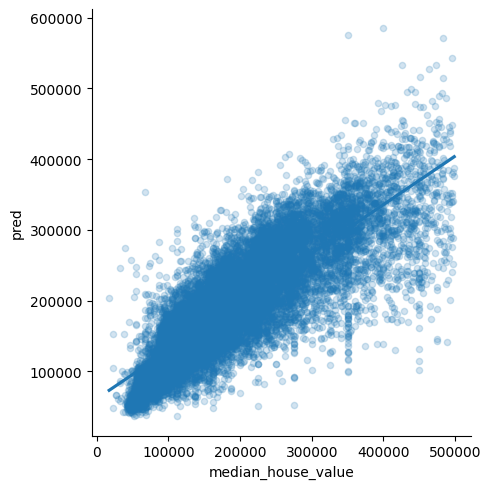

In [29]:
sns.lmplot('median_house_value','pred', df, scatter_kws={'s':20,'alpha':0.2})


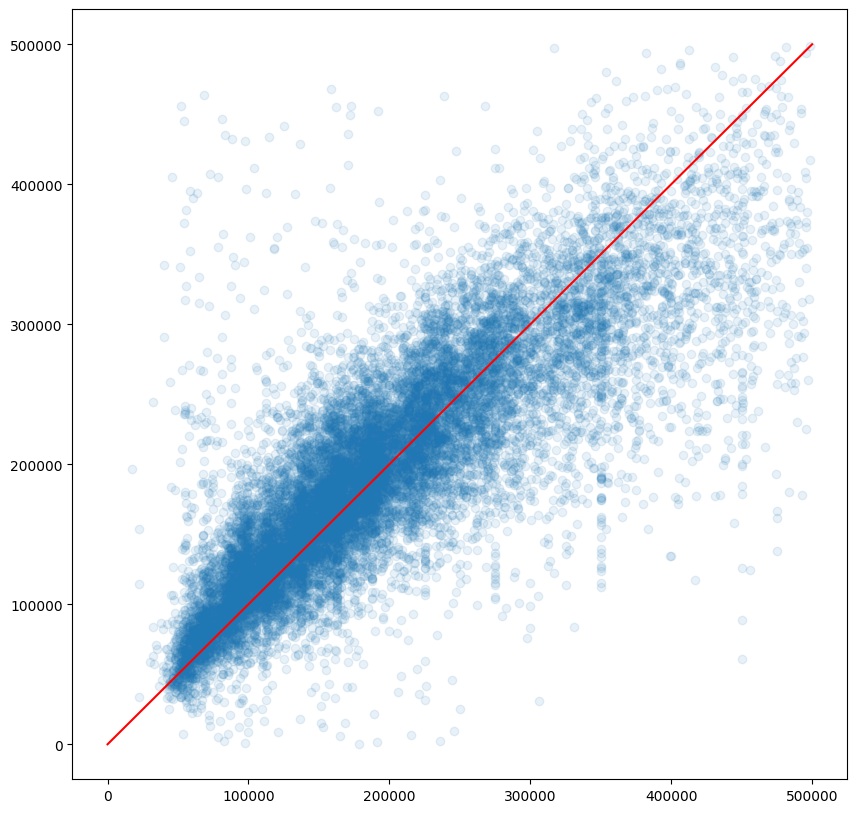

In [43]:
plt.figure(figsize = (10,10))
plt.scatter(df['median_house_value'],df['pred'], alpha = 0.1)
plt.plot([0,500000],[0,500000], c ='r')

In [ ]:
df.head(2)

In [ ]:
print(g.county)

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.shape


In [ ]:
df.count()/df.shape[0]

In [ ]:
df = df.dropna()

In [4]:
df_sub = df.sample(frac=0.2, replace=True, random_state=1)
df_sub = df_sub.reset_index()
df_sub = df_sub.drop(columns = ['index'])

In [ ]:
df_sub.head()

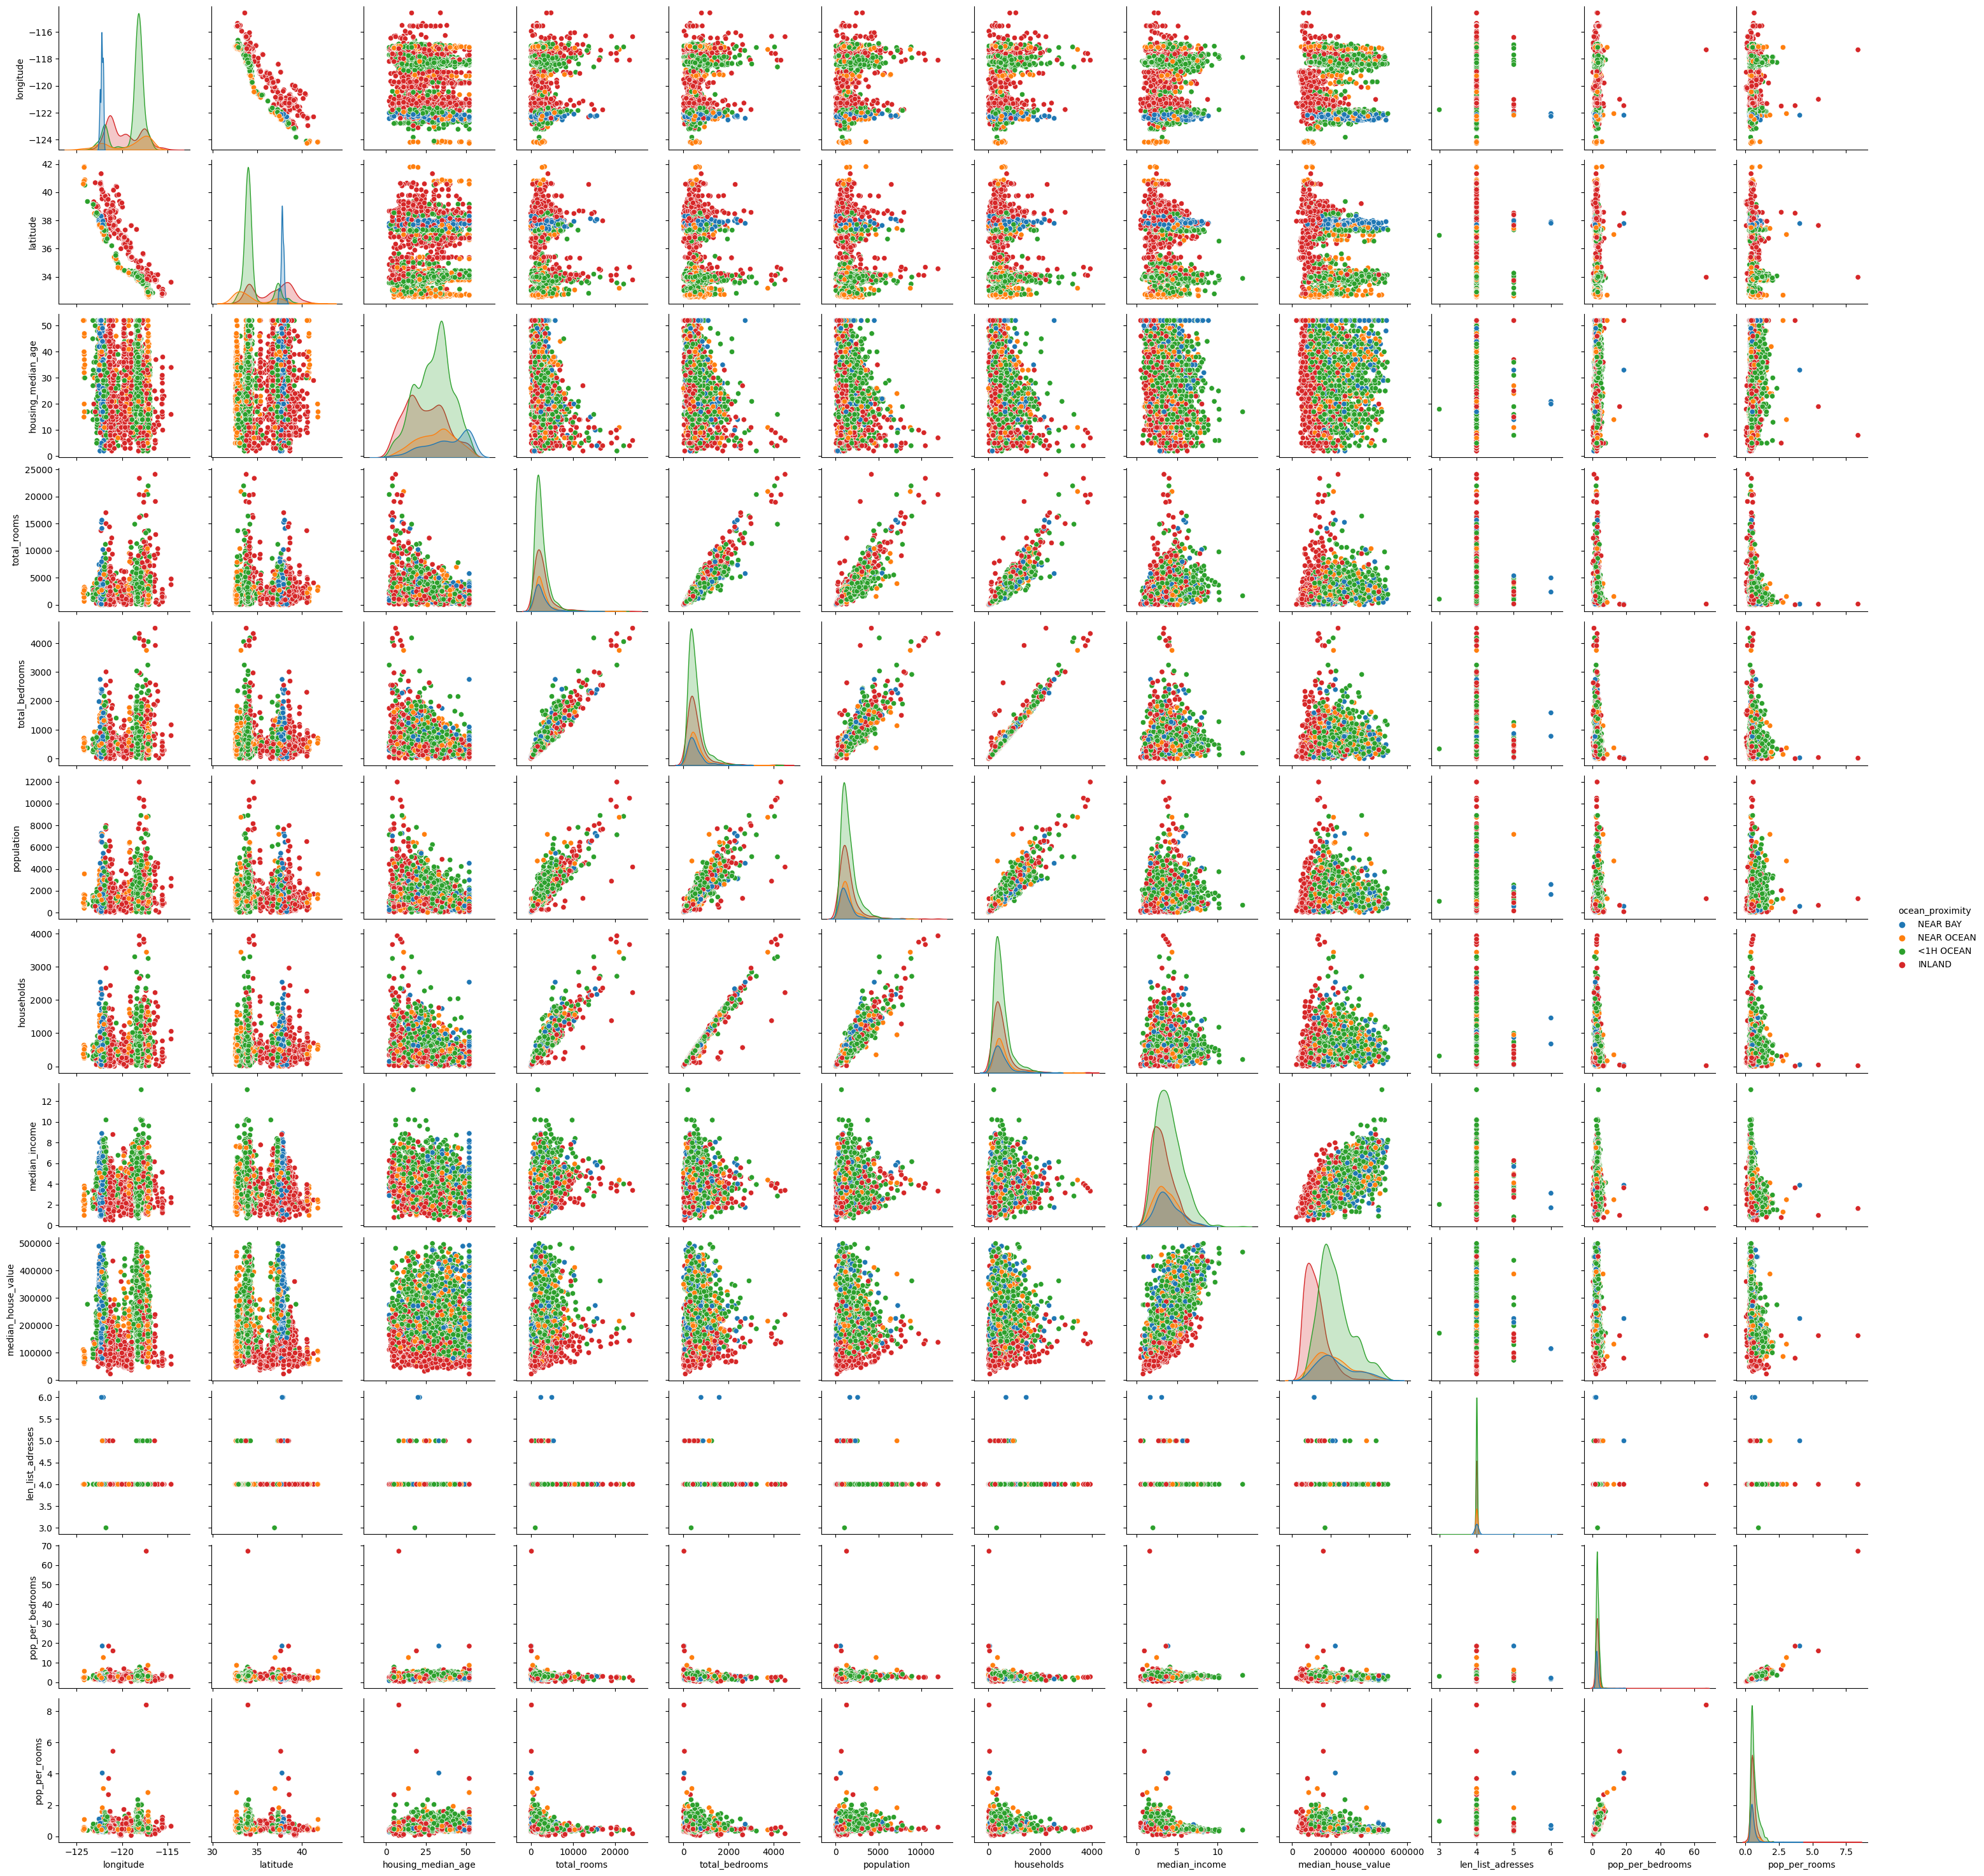

In [5]:
sns.pairplot(df_sub, hue = 'ocean_proximity')

In [ ]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
geo1 = pd.read_csv('geoloc.csv')
geo2 = pd.read_csv('geoloc2.csv')

In [ ]:
geo1

In [ ]:
geo3

In [ ]:
geo3 = {}

for i in geo1['Unnamed: 0']:
    geo3[i] = geo1['0'].iloc[i]


In [ ]:
geo2

In [ ]:
for i in geo2.index:
    geo3[geo2['Unnamed: 0'].iloc[i]] = geo2['0'].iloc[i]

In [ ]:
geo3_df = pd.DataFrame.from_dict(geo3, orient = 'index')
geo3_df.to_csv('geoloc_full.csv') 

In [ ]:
df['addresses'] = geo3_df[0]

In [ ]:
df

In [ ]:
geo3_df[0]